In [1]:
import bayesnf as bnf
import pandas as pd
import jax
import time
import os, sys
sys.path.insert(0, "../modules")
import evaluate as ev
import numpy as np
import utility as ut

ds = "L96"
root = f"../data/{ds}"
df_train = pd.read_csv(f"{root}/train.csv")
feature_cols = df_train.columns[:-1].to_list()
target_col = df_train.columns[-1]
n = len(feature_cols)
interactions = [(i, j) for i in range(n) for j in range(n) if i < j]
print(len(interactions))

bnf_kwargs = {"width": 2,
  "depth": 2,
  "freq": None,
  "seasonality_periods": None,
  "num_seasonal_harmonics": None,
  "feature_cols": feature_cols,
  "target_col": target_col,
  "observation_model": 'NORMAL',
  "timetype": 'float',
  "standardize":  None,
  "interactions": interactions}

model = bnf.BayesianNeuralFieldMAP(**bnf_kwargs)

start = time.time()
model.fit(df_train.iloc[:int(10), :], seed=jax.random.PRNGKey(0), num_epochs=1,)
print(f"Time Taken = {time.time()-start:.3f}")

z = ev.parallel_forecast(model, 0, np.ones((40, 5)), 4)#, 10, 0.01)
# print(z)
# train, test = ev.get_data(f"{root}/train.npy", sep=int(1e5))
# prediction = ev.evaluate(model, root, 10)
# print(np.sqrt(((test[:, :10] - prediction)**2).sum(axis=0).mean()))

# # ut.save(model, os.path.abspath(f"{root}/model"), step=2)
# train = np.load(f"{root}/train.npy")
# x = train[:, 1:6]
# t = 1. 
# y = ev.parallel_forecast(model, t, x, I=4)
# print(x.shape, y.shape)

# z = ev.multistep_forecast(model, t, x, 4, 3, 0.01)
print(z.shape)


45
Time Taken = 3.709
Time taken by parallel_forecast is 0.3875 seconds
(40, 5)


In [6]:
train, test = ev.get_data(f"{root}/train.npy", sep=int(1e5))
prediction = ev.evaluate(model, root, 10)
print(np.sqrt(((test[:, :10] - prediction)**2).sum(axis=0).mean()))

22.31397215016081


In [9]:
new_model = ut.load(os.path.abspath(f"{root}/model"), df_train, **bnf_kwargs)
train, test = ev.get_data(f"{root}/train.npy", sep=int(1e5))
prediction = ev.evaluate(new_model, root, 10)
print(np.sqrt(((test[:, :10] - prediction)**2).sum(axis=0).mean()))

Time taken by load is 2.0222 seconds
30.190890853770135


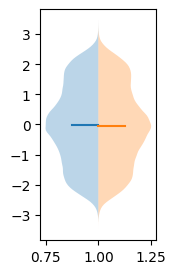

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(1.5, 3))
vp_left = ax.violinplot(df_test.loc[:, feature_cols[1:]].to_numpy().flatten(), showextrema=False, showmeans=True, side="low")
vp_right = ax.violinplot(df_train.loc[:50000, feature_cols[1:]].to_numpy().flatten(), showextrema=False, showmeans=True, side="high")

In [4]:
a = z.flatten()
b = a.reshape((40, 5))
c = a.reshape((5, 40)).T

In [5]:
b-c

Array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0.

In [8]:
a = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])
a.reshape((4, 3))

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])